In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import jax
import jax.numpy as jnp
import numpy as np
import gymnax
from minatar import Environment

import matplotlib.pyplot as plt

# Asterix MinAtar Environment

In [2]:
# 2D State Space, 3D Obs Space, 1D Action Space [Continuous - Torque]
rng, reset, step, env_params = gymnax.make("Asterix-MinAtar")
rng, key_reset, key_step = jax.random.split(rng, 3)
obs, state = reset(key_reset, env_params)

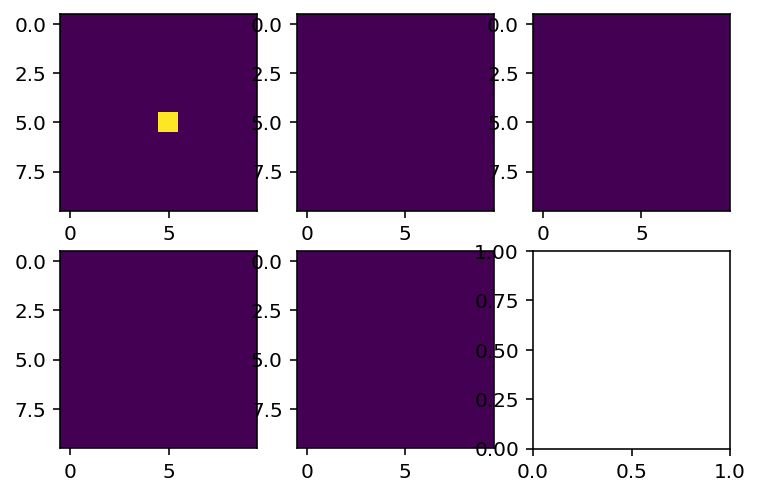

In [3]:
fig, axs = plt.subplots(2, 3)
for i in range(5):
    axs.flatten()[i].imshow(obs[:, :, i])

In [4]:
obs.shape, state

((10, 10, 4), {'entities': DeviceArray([[0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0]], dtype=int32),
  'move_speed': DeviceArray(5, dtype=int32),
  'move_timer': DeviceArray(5, dtype=int32),
  'player_x': DeviceArray(5, dtype=int32),
  'player_y': DeviceArray(5, dtype=int32),
  'ramp_index': DeviceArray(0, dtype=int32),
  'ramp_timer': DeviceArray(100, dtype=int32),
  'shot_timer': DeviceArray(0, dtype=int32),
  'spawn_speed': DeviceArray(10, dtype=int32),
  'spawn_timer': DeviceArray(10, dtype=int32),
  'terminal': DeviceArray(0, dtype=int32)})

In [5]:
env = Environment("asterix")
obs = env.reset()
action = 1
reward_gym, done_gym = env.act(action)
obs_gym = env.state()
reward_gym, done_gym, obs_gym.shape

(0, False, (10, 10, 4))

In [6]:
state

{'entities': DeviceArray([[0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0]], dtype=int32),
 'move_speed': DeviceArray(5, dtype=int32),
 'move_timer': DeviceArray(5, dtype=int32),
 'player_x': DeviceArray(5, dtype=int32),
 'player_y': DeviceArray(5, dtype=int32),
 'ramp_index': DeviceArray(0, dtype=int32),
 'ramp_timer': DeviceArray(100, dtype=int32),
 'shot_timer': DeviceArray(0, dtype=int32),
 'spawn_speed': DeviceArray(10, dtype=int32),
 'spawn_timer': DeviceArray(10, dtype=int32),
 'terminal': DeviceArray(0, dtype=int32)}

In [7]:
obs_jax, state_jax, reward_jax, done_jax, _ = step(key_step, env_params,
                                                   state, action)
state_jax, reward_jax, done_jax

({'entities': DeviceArray([[0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0]], dtype=int32),
  'move_speed': DeviceArray(5, dtype=int32),
  'move_timer': DeviceArray(4, dtype=int32),
  'player_x': DeviceArray(5, dtype=int32),
  'player_y': DeviceArray(4, dtype=int32),
  'ramp_index': DeviceArray(0, dtype=int32),
  'ramp_timer': DeviceArray(99, dtype=int32),
  'shot_timer': DeviceArray(0, dtype=int32),
  'spawn_speed': DeviceArray(10, dtype=int32),
  'spawn_timer': DeviceArray(9, dtype=int32),
  'terminal': DeviceArray(0, dtype=int32)},
 DeviceArray(0, dtype=int32),
 DeviceArray(False, dtype=bool))

# Breakout MinAtar Environment

In [27]:
env = Environment("breakout", sticky_action_prob =0.0)
env.reset()
obs_gym = env.state()

In [28]:
state = {'ball_dir': env.env.ball_dir,
         'ball_x': env.env.ball_x,
         'ball_y': env.env.ball_y,
         'brick_map': env.env.brick_map,
         'last_x': env.env.last_x,
         'last_y': env.env.last_y,
         'pos': env.env.pos,
         'strike': env.env.strike,
         'terminal': env.env.terminal}

In [29]:
action = 1
reward_gym, done_gym = env.act(action)
next_obs_gym = env.state()
reward_gym, done_gym, obs_gym.shape

(0, False, (10, 10, 4))

In [30]:
# 2D State Space, 3D Obs Space, 1D Action Space [Continuous - Torque]
rng, reset, step, env_params = gymnax.make("Breakout-MinAtar")
rng, key_reset, key_step = jax.random.split(rng, 3)
o, s = reset(key_reset, env_params)

In [31]:
obs_jax, state_jax, reward_jax, done_jax, _ = step(key_step, env_params,
                                                   state, action)
state_jax, reward_jax, done_jax

action jax 1
pos jax pre 4
pos jax post 3


({'ball_dir': DeviceArray(2, dtype=int32),
  'ball_x': DeviceArray(1, dtype=int32),
  'ball_y': DeviceArray(4, dtype=int32),
  'brick_map': DeviceArray([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
               [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
               [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
               [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
               [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
               [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
               [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
               [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
               [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
               [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
  'last_x': 0,
  'last_y': 3,
  'pos': DeviceArray(3, dtype=int32),
  'strike': DeviceArray(0, dtype=int32),
  'terminal': DeviceArray(False, dtype=bool)},
 DeviceArray(0, dtype=int32),
 False)

In [32]:
(obs_jax == next_obs_gym).all()

DeviceArray(True, dtype=bool)

In [95]:
seed = 3
env = Environment("breakout", sticky_action_prob =0.0, random_seed=seed)
env.reset()
np.random.seed(seed)
action_space = [1, 3]
for i in range(10):
    # print("pos gym pre", env.env.pos)
    state_jax = {'ball_dir': env.env.ball_dir,
                 'ball_x': env.env.ball_x,
                 'ball_y': env.env.ball_y,
                 'brick_map': env.env.brick_map,
                 'last_x': env.env.last_x,
                 'last_y': env.env.last_y,
                 'pos': env.env.pos,
                 'strike': env.env.strike,
                 'terminal': env.env.terminal}
    action = np.random.choice(action_space)
    #print("gym_pre", env.env.ball_x, env.env.ball_y , env.env.pos)
    reward_gym, done_gym = env.act(action)
    #print("pos gym post", env.env.pos, print(done_gym))
    next_obs_gym = env.state()
    #print("gym_post", env.env.ball_x, env.env.ball_y , env.env.pos)
    
    obs_jax, state_jax, reward_jax, done_jax, _ = step(key_step, env_params,
                                                       state_jax, action)
    #print(done_jax)
    
    #print(i, "==========")
    if not (obs_jax == next_obs_gym).all():
        print("===")
        print("Problem")
        for i in range(4):
            print((obs_jax[:, :, i] == next_obs_gym[:, :, i]).all())
        break
    if done_gym:
        break
    

In [68]:
(obs_jax[:, :, 1] == next_obs_gym[:, :, 1]).all()

DeviceArray(False, dtype=bool)

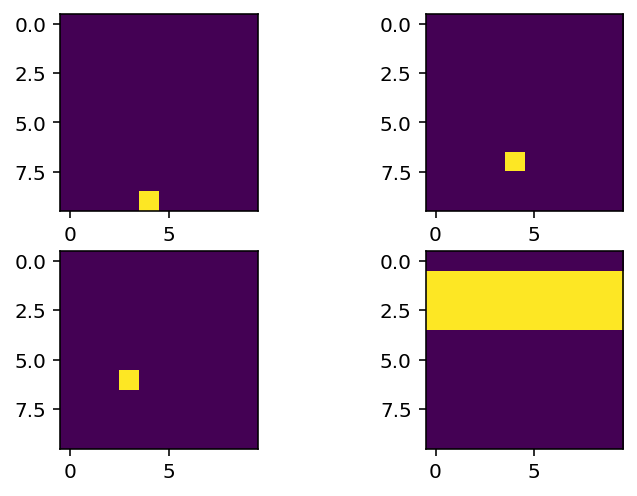

In [69]:
fig, axs = plt.subplots(2, 2)
for i in range(4):
    axs.flatten()[i].imshow(next_obs_gym[:, :, i])

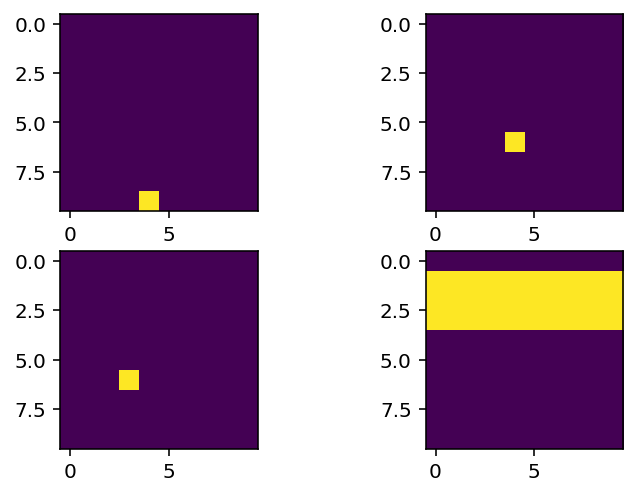

In [70]:
fig, axs = plt.subplots(2, 2)
for i in range(4):
    axs.flatten()[i].imshow(obs_jax[:, :, i])

# Freeway MinAtar Environment

In [ ]:
# 2D State Space, 3D Obs Space, 1D Action Space [Continuous - Torque]
rng, reset, step, env_params = gymnax.make("Freeway-MinAtar")
rng, key_reset, key_step = jax.random.split(rng, 3)
obs, state = reset(key_reset, env_params)